In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import astropy.units as u
import scipy
import astropy.constants as const

plt.style.use('science')

In [4]:
h = const.h
c = const.c
k = const.k_B
sigma = const.sigma_sb
pi = np.pi

In [33]:
(2 * pi * k**4 / (c**2 * sigma * h**3)).decompose().value, 15 / pi**4

(0.15398973382026504, 0.15398973382026507)

In [34]:
def F_B(x):
    prefactor = 15 / pi**4 #2 * pi * k**4 / (c**2 * sigma * h**3)
    return prefactor * (x**4 / (np.exp(x) - 1))

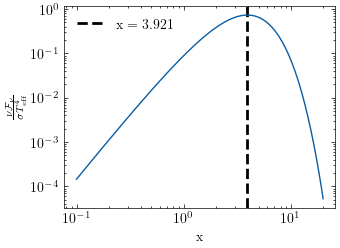

In [35]:
x = np.logspace(-1,1.3,1000)
plt.axvline(3.921, color = 'k', linestyle = 'dashed', lw = 2, label = r'$\rm x = 3.921$')
plt.plot(x,F_B(x))
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\frac{\nu \mathcal{F}_{\nu}}{\sigma T_{\rm eff}^4}$')
plt.savefig('nu_f_nu_B.pdf', dpi = 300)

In [36]:
def Teff_T(tau):
    return ((4/3) / (tau + 2/3))**0.25

In [42]:
def integrand(tau,x):
    return scipy.special.expn(2,tau) / (np.exp(x * Teff_T(tau)) - 1)

In [71]:
x = np.logspace(-1,1.3,1000)

integral = [scipy.integrate.quad(integrand, a = 0, b = 100, args = (i))[0] for i in x]
F_E = (30 * (x/pi)**4) * integral

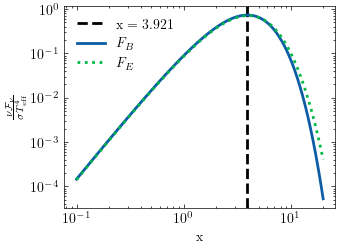

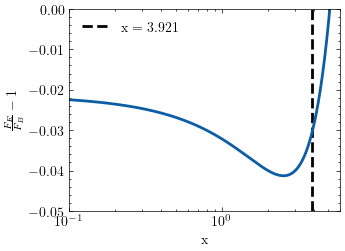

In [82]:
FB = F_B(x)
plt.axvline(3.921, color = 'k', linestyle = 'dashed', lw = 2, label = r'$\rm x = 3.921$')
plt.plot(x,F_B(x), label = r'$F_B$', lw = 2)
plt.plot(x,F_E, linestyle = 'dotted', label = r'$F_E$', lw = 2)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel(r'$\frac{\nu \mathcal{F}_{\nu}}{\sigma T_{\rm eff}^4}$')
plt.savefig('F_E.pdf', dpi = 300)
plt.show()

plt.axvline(3.921, color = 'k', linestyle = 'dashed', lw = 2, label = r'$\rm x = 3.921$')
plt.plot(x,(F_E/FB) - 1, lw = 2)
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel(r'$\frac{F_E}{F_B} - 1$')
plt.xlim(1e-1,6)
plt.ylim(-0.05,0)
plt.savefig('dF_E_F_B.pdf', dpi = 300)

In [73]:
F_E/FB - 1

array([-2.24802787e-02, -2.24860309e-02, -2.24918140e-02, -2.24976281e-02,
       -2.25034734e-02, -2.25093501e-02, -2.25152583e-02, -2.25211983e-02,
       -2.25271701e-02, -2.25331739e-02, -2.25392100e-02, -2.25452785e-02,
       -2.25513796e-02, -2.25575134e-02, -2.25636801e-02, -2.25698799e-02,
       -2.25761131e-02, -2.25823797e-02, -2.25886799e-02, -2.25950139e-02,
       -2.26013820e-02, -2.26077842e-02, -2.26142209e-02, -2.26206921e-02,
       -2.26271980e-02, -2.26337389e-02, -2.26403149e-02, -2.26469262e-02,
       -2.26535730e-02, -2.26602555e-02, -2.26669739e-02, -2.26737284e-02,
       -2.26805192e-02, -2.26873464e-02, -2.26942103e-02, -2.27011111e-02,
       -2.27080490e-02, -2.27150241e-02, -2.27220367e-02, -2.27290869e-02,
       -2.27361751e-02, -2.27433013e-02, -2.27504658e-02, -2.27576688e-02,
       -2.27649105e-02, -2.27721911e-02, -2.27795108e-02, -2.27868699e-02,
       -2.27942685e-02, -2.28017069e-02, -2.28091852e-02, -2.28167037e-02,
       -2.28242627e-02, -

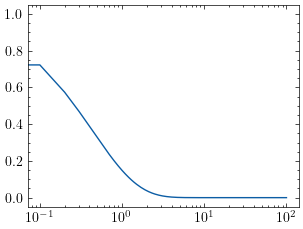

In [76]:
tau = np.linspace(0,100,1000)
e2tau = scipy.special.expn(2,tau)

plt.plot(tau,e2tau)
plt.xscale('log')
# plt.yscale('log')